In [1]:
import numpy as np
from actfunc import relu
from layer import dense, mean_square_error
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
X = np.linspace(-10, 10, 200).reshape(-1, 1)
y = 3 * X + 5 + np.random.randn(*X.shape) * 3

In [3]:
dense1 = dense(1, 20, activation=relu)
dense2 = dense(20, 1)
MSE = mean_square_error()

In [ ]:
class GDoptimizer():
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.variable = {}
    
    def get_variable(self, layers):
        
        

In [4]:
loss_list = []
learning_rate = 0.01
for i in range(1000):
    predict = dense2.forward(dense1.forward(X))
    loss = MSE.forward(predict, y)
    loss_list.append(loss)
    dense1.backward(dense2.backward(MSE.backward()))
    dense1.W -= learning_rate * dense1.dW
    dense1.b -= learning_rate * dense1.db
    dense2.W -= learning_rate * dense2.dW
    dense2.b -= learning_rate * dense2.db

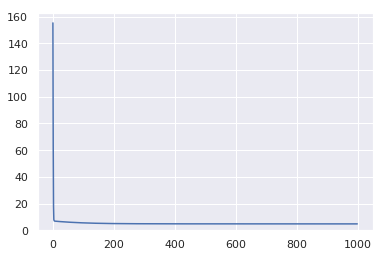

In [5]:
plt.plot(loss_list)
plt.ylim((0, None));

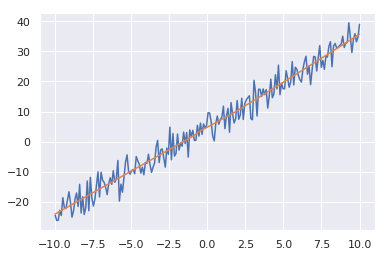

In [6]:
plt.plot(X, y)
plt.plot(X, predict);